In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

### Copying Images

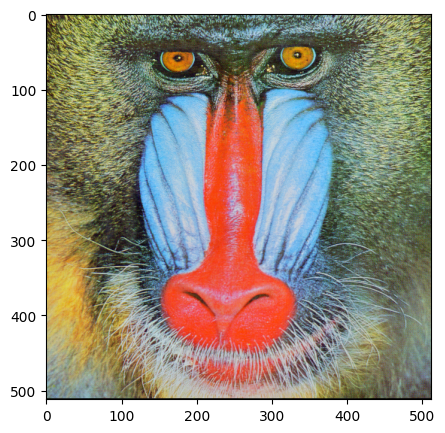

In [ ]:
baboon = np.array(Image.open('imgs/baboon.png'))

plt.figure(figsize=(5,5))
plt.imshow(baboon)
plt.show()

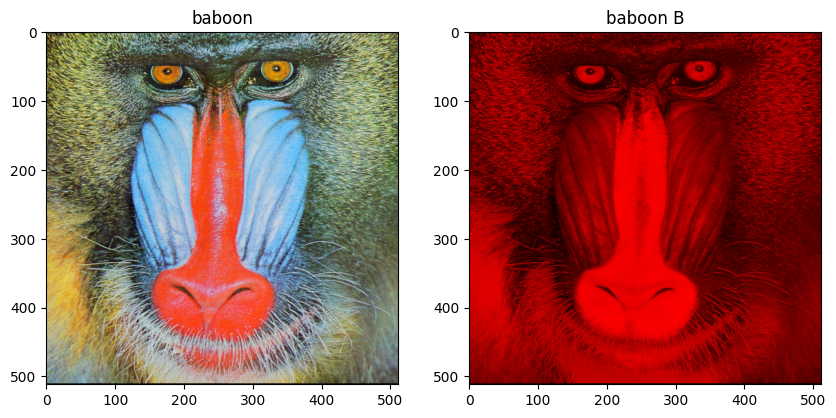

In [ ]:
baboon_B = baboon.copy()
baboon_B[:,:,1] = 0  # Mask out green channel
baboon_B[:,:,2] = 0  # Mask out blue channel

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(baboon)
plt.title("baboon")
plt.subplot(122)
plt.imshow(baboon_B)
plt.title("baboon B")
plt.show()

### Flipping Images

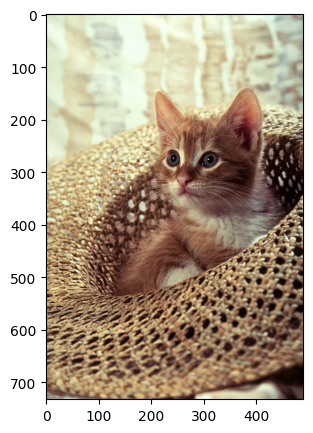

In [10]:
cat = Image.open('imgs/cat.png')

plt.figure(figsize=(5,5))
plt.imshow(cat)
plt.show()

In [11]:
array = np.array(cat)
width, height, channels = array.shape
print('widht, height, channels', width, height, channels)

widht, height, channels 733 490 3


In [12]:
from PIL import ImageOps

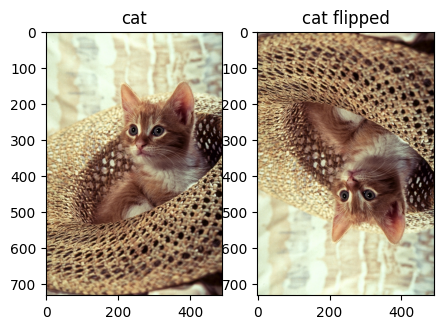

In [13]:
cat_flip = ImageOps.flip(cat)

plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(cat)
plt.title('cat')
plt.subplot(122)
plt.imshow(cat_flip)
plt.title('cat flipped')

plt.show()

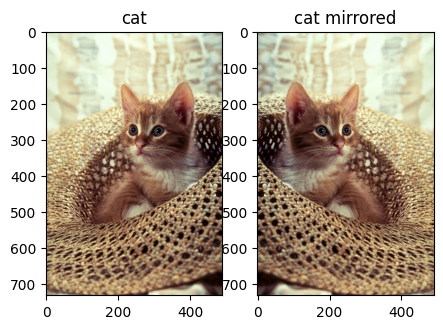

In [19]:
cat_mirror = ImageOps.mirror(cat)

plt.figure(figsize=(5,5))
plt.subplot(121)
plt.imshow(cat)
plt.title('cat')
plt.subplot(122)
plt.imshow(cat_mirror)
plt.title('cat mirrored')

plt.show()

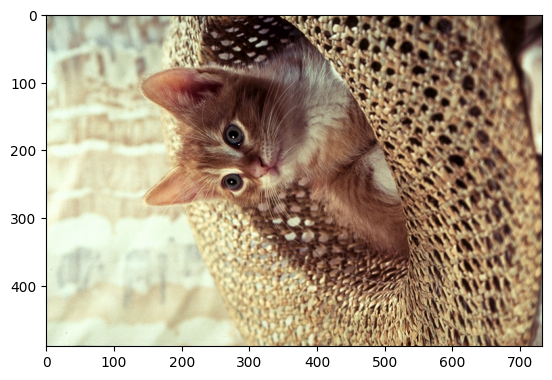

In [23]:
cat_transpose = cat.transpose(2)

plt.imshow(cat_transpose)
plt.show()

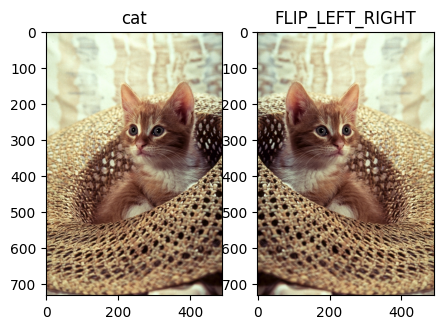

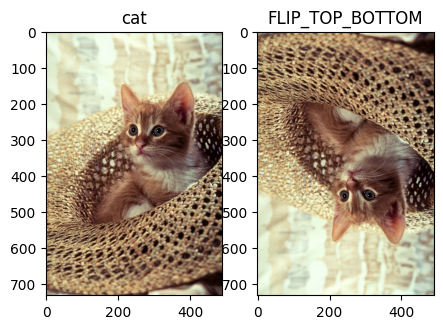

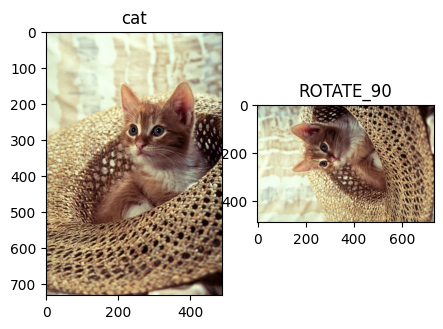

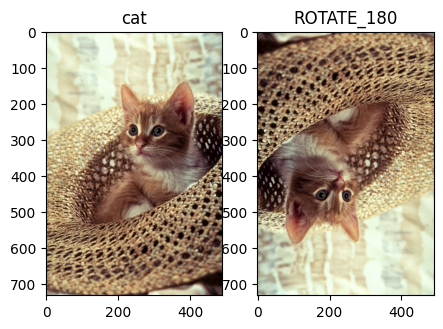

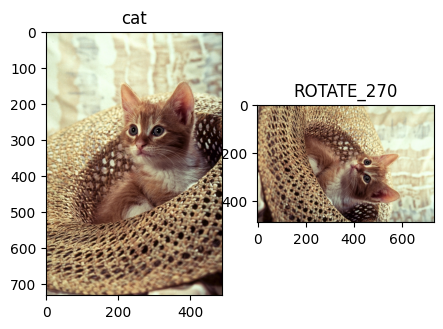

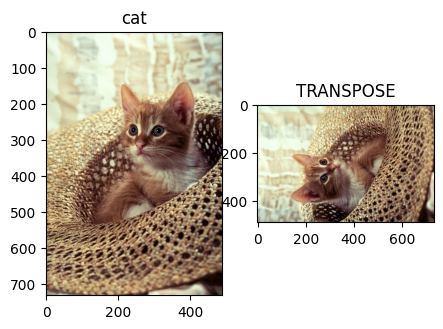

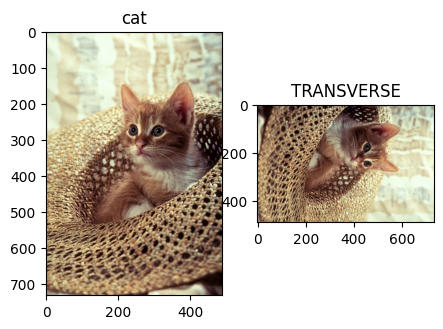

In [26]:
operations = {
    'FLIP_LEFT_RIGHT': Image.FLIP_LEFT_RIGHT,
    'FLIP_TOP_BOTTOM': Image.FLIP_TOP_BOTTOM,
    'ROTATE_90': Image.ROTATE_90,
    'ROTATE_180': Image.ROTATE_180,
    'ROTATE_270': Image.ROTATE_270,
    'TRANSPOSE': Image.TRANSPOSE,
    'TRANSVERSE': Image.TRANSVERSE,
}

for lbl, op in operations.items():
    plt.figure(figsize=(5, 5))
    plt.subplot(121)
    plt.imshow(cat)
    plt.title('cat')

    plt.subplot(122)
    plt.imshow(cat.transpose(op))
    plt.title(lbl)

    plt.show()

### Cropping

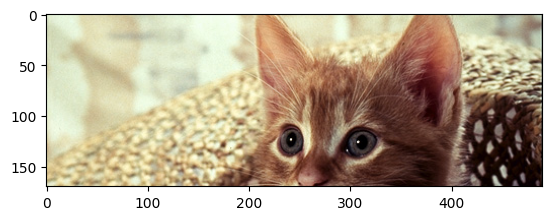

In [33]:
img = np.array(cat)

upper = 150
lower = 320
crop_top = img[upper:lower,:,:]

plt.imshow(crop_top)
plt.show()

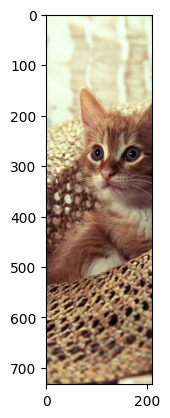

In [36]:
left = 140
right = 350
crop_left_right = img[:,left:right,:]

plt.imshow(crop_left_right)
plt.show()

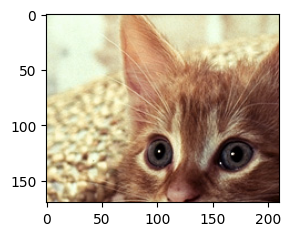

In [51]:
cat_cropped = cat.crop((left, upper, right, lower))

plt.figure(figsize=(3,4))
plt.imshow(cat_cropped)
plt.show()

### Changing Image Pixels

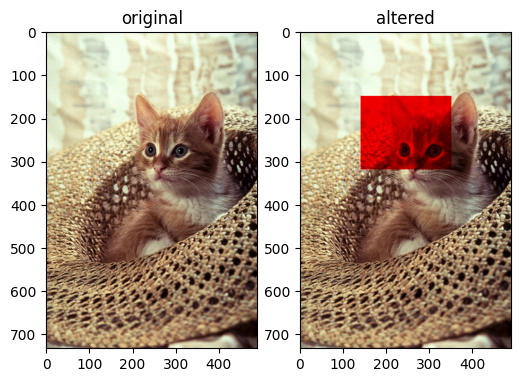

In [70]:
array_sq = np.copy(array)
array_sq[upper:lower, left:right, 1:3] = 0

plt.figure(figsize=(6,6))
plt.subplot(121)
plt.imshow(cat)
plt.title('original')
plt.subplot(122)
plt.imshow(array_sq)
plt.title('altered')
plt.show()

#### Drawing a shape onto an image

In [71]:
from PIL import ImageDraw

In [72]:
img_draw = cat.copy()
img_fn = ImageDraw.Draw(im=img_draw)

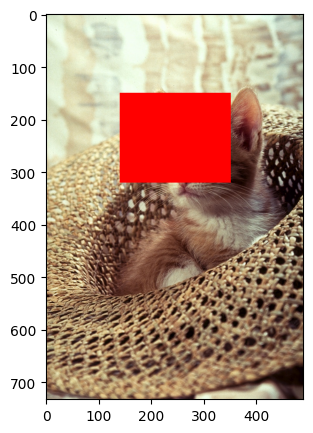

In [74]:
shape = (left, upper, right, lower)
img_fn.rectangle(xy=shape, fill='red')

plt.figure(figsize=(5,5))
plt.imshow(img_draw)
plt.show()

#### Adding text to an image

In [75]:
from PIL import ImageFont

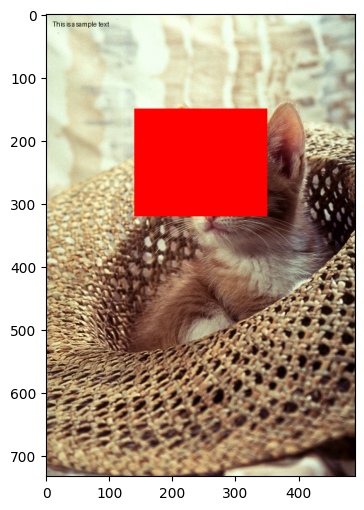

In [76]:
img_fn.text(xy=(10,10), text='This is a sample text', fill=(0,0,0))

plt.figure(figsize=(6,6))
plt.imshow(img_draw)
plt.show()

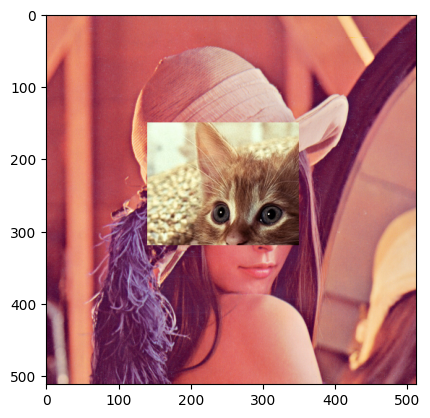

In [78]:
# Transferring pixels from one Image to another

img_lenna = Image.open('imgs/lenna.png')
lenna_array = np.array(img_lenna)
cat_array = np.array(cat)
lenna_array[upper:lower, left:right, :] = cat_array[upper:lower, left:right, :]

plt.imshow(lenna_array)
plt.show()

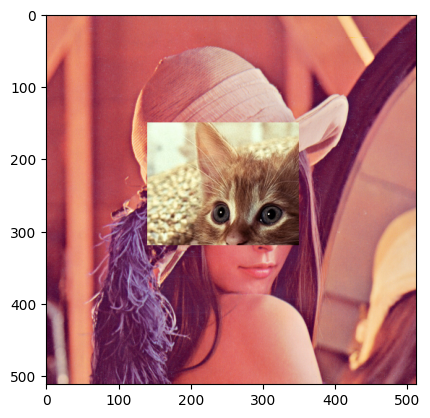

In [79]:
# alternatively...
img_lenna.paste(cat_cropped, box=(left, upper))

plt.imshow(img_lenna)
plt.show()